Cho dữ liệu **machine.data.txt**
Yêu cầu: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và **chọn một thuật toán thích hợp** để thực hiện việc dự đoán giá trị **ERP (estimated relative performance)**, là **cột cuối cùng (cột 9)** trong dataframe  dựa trên các thông tin được cung cấp (loại bỏ các cột dữ liệu nếu không cần thiết)  
1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc và được chuẩn hóa với tỷ lệ dữ liệu test là 0.3.  
2. Áp dụng thuật toán thích hợp để xây dựng model. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp?   
3. Đánh giá model dựa trên train/test.  
4. Trực quan hóa kết quả (nếu có). Đưa ra một số nhận xét dựa trên kết quả.  
5. Với X_new như sau :  
X_new = [['amdahl','470v/7b',29,8000,32000,32,8,32,172], ['sperry','1100/83',50,2000,32000,112,52,104,307]]  
thì ERP lần lượt là bao nhiêu? 

 **----------------------------------------------------  DATA OVERVIEW  ----------------------------------------------------------**

In [1]:
import pandas as pd
data = pd.read_csv('du lieu cung cap/machine.data.txt', header=None)

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
0    209 non-null object
1    209 non-null object
2    209 non-null int64
3    209 non-null int64
4    209 non-null int64
5    209 non-null int64
6    209 non-null int64
7    209 non-null int64
8    209 non-null int64
9    209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [3]:
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 209
Number of columns: 10


In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [5]:
descrip = data.describe(include='all').transpose()
pd.options.display.max_rows = 1000
display(descrip)
pd.options.display.max_rows = 15

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
0,209,30,ibm,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,209,209,7.870-2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,209,NaN,NaN,NaN,203.823,260.263,17,50,110,225,1500
3,209,NaN,NaN,NaN,2867.98,3878.74,64,768,2000,4000,32000
4,209,NaN,NaN,NaN,11796.2,11726.6,64,4000,8000,16000,64000
5,209,NaN,NaN,NaN,25.2057,40.6287,0,0,8,32,256
6,209,NaN,NaN,NaN,4.69856,6.81627,0,1,2,6,52
7,209,NaN,NaN,NaN,18.2679,25.9973,0,5,8,24,176
8,209,NaN,NaN,NaN,105.622,160.831,6,27,50,113,1150
9,209,NaN,NaN,NaN,99.3301,154.757,15,28,45,101,1238


**Nhận xét:**  
- Biến (1) có unique value bằng đúng với số row data => Loại khỏi input
- Biến (0) cần chuyển sang int

In [6]:
data.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [7]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data[10] = lb.fit_transform(data[0])

# check outputs coding
lb_0 =data[[0,10]].drop_duplicates()
pd.options.display.max_rows = 1000
display(lb_0)
pd.options.display.max_rows = 15

,0,10
0,adviser,0
1,amdahl,1
10,apollo,2
12,basf,3
14,bti,4
16,burroughs,5
24,c.r.d,6
30,cdc,8
39,cambex,7
44,dec,9


**1. Tạo X_train, X_test, y_train, y_test từ dữ liệu đã đọc và chuẩn hóa, với tỷ lệ dữ liệu test là 0.3**

In [8]:
# inputs = data.iloc[:,0:-1]
inputs = data[[2,3,4,5,6,7,8,10]]
inputs.shape

(209, 8)

In [9]:
inputs.head()

,2,3,4,5,6,7,8,10
0,125,256,6000,256,16,128,198,0
1,29,8000,32000,32,8,32,269,1
2,29,8000,32000,32,8,32,220,1
3,29,8000,32000,32,8,32,172,1
4,29,8000,16000,32,8,16,132,1


In [10]:
import numpy as np
# outputs = data.iloc[:,-1]
outputs = data[9]
outputs = np.array(outputs)
outputs.shape

(209,)

In [11]:
outputs

array([ 199,  253,  253,  253,  132,  290,  381,  381,  749, 1238,   23,
         24,   70,  117,   15,   64,   23,   29,   22,  124,   35,   39,
         40,   45,   28,   21,   28,   22,   28,   27,  102,  102,   74,
         74,  138,  136,   23,   29,   44,   30,   41,   74,   74,   74,
         54,   41,   18,   28,   36,   38,   34,   19,   72,   36,   30,
         56,   42,   34,   34,   34,   34,   34,   19,   75,  113,  157,
         18,   20,   28,   33,   47,   54,   20,   23,   25,   52,   27,
         50,   18,   53,   23,   30,   73,   20,   25,   28,   29,   32,
        175,   57,  181,  181,   32,   82,  171,  361,  350,  220,  113,
         15,   21,   35,   18,   20,   20,   28,   45,   18,   17,   26,
         28,   28,   31,   31,   42,   76,   76,   26,   59,   65,  101,
        116,   18,   20,   20,   30,   44,   44,   82,   82,  128,   37,
         46,   46,   80,   88,   88,   33,   46,   29,   53,   53,   41,
         86,   95,  107,  117,  119,  120,   48,  1

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, 
                                                    test_size=0.30, 
                                                    random_state=42)

**2. Áp dụng thuật toán thích hợp để xây dựng model. Dựa trên cơ sở nào để cho rằng thuật toán này thích hợp?**

**3. Đánh giá model dựa trên train/test**

**4. Trực quan hóa kết quả (nếu có). Đưa ra một số nhận xét dựa trên kết quả**

Đây là bài toán Regression thuộc nhóm Supervised Learning. 
Model có thể dùng cho dạng bài toán này:  
    Linear Regression

 **---------------------------------------------------- 1. LINEAR REGRESSION  ----------------------------------------------------------**

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

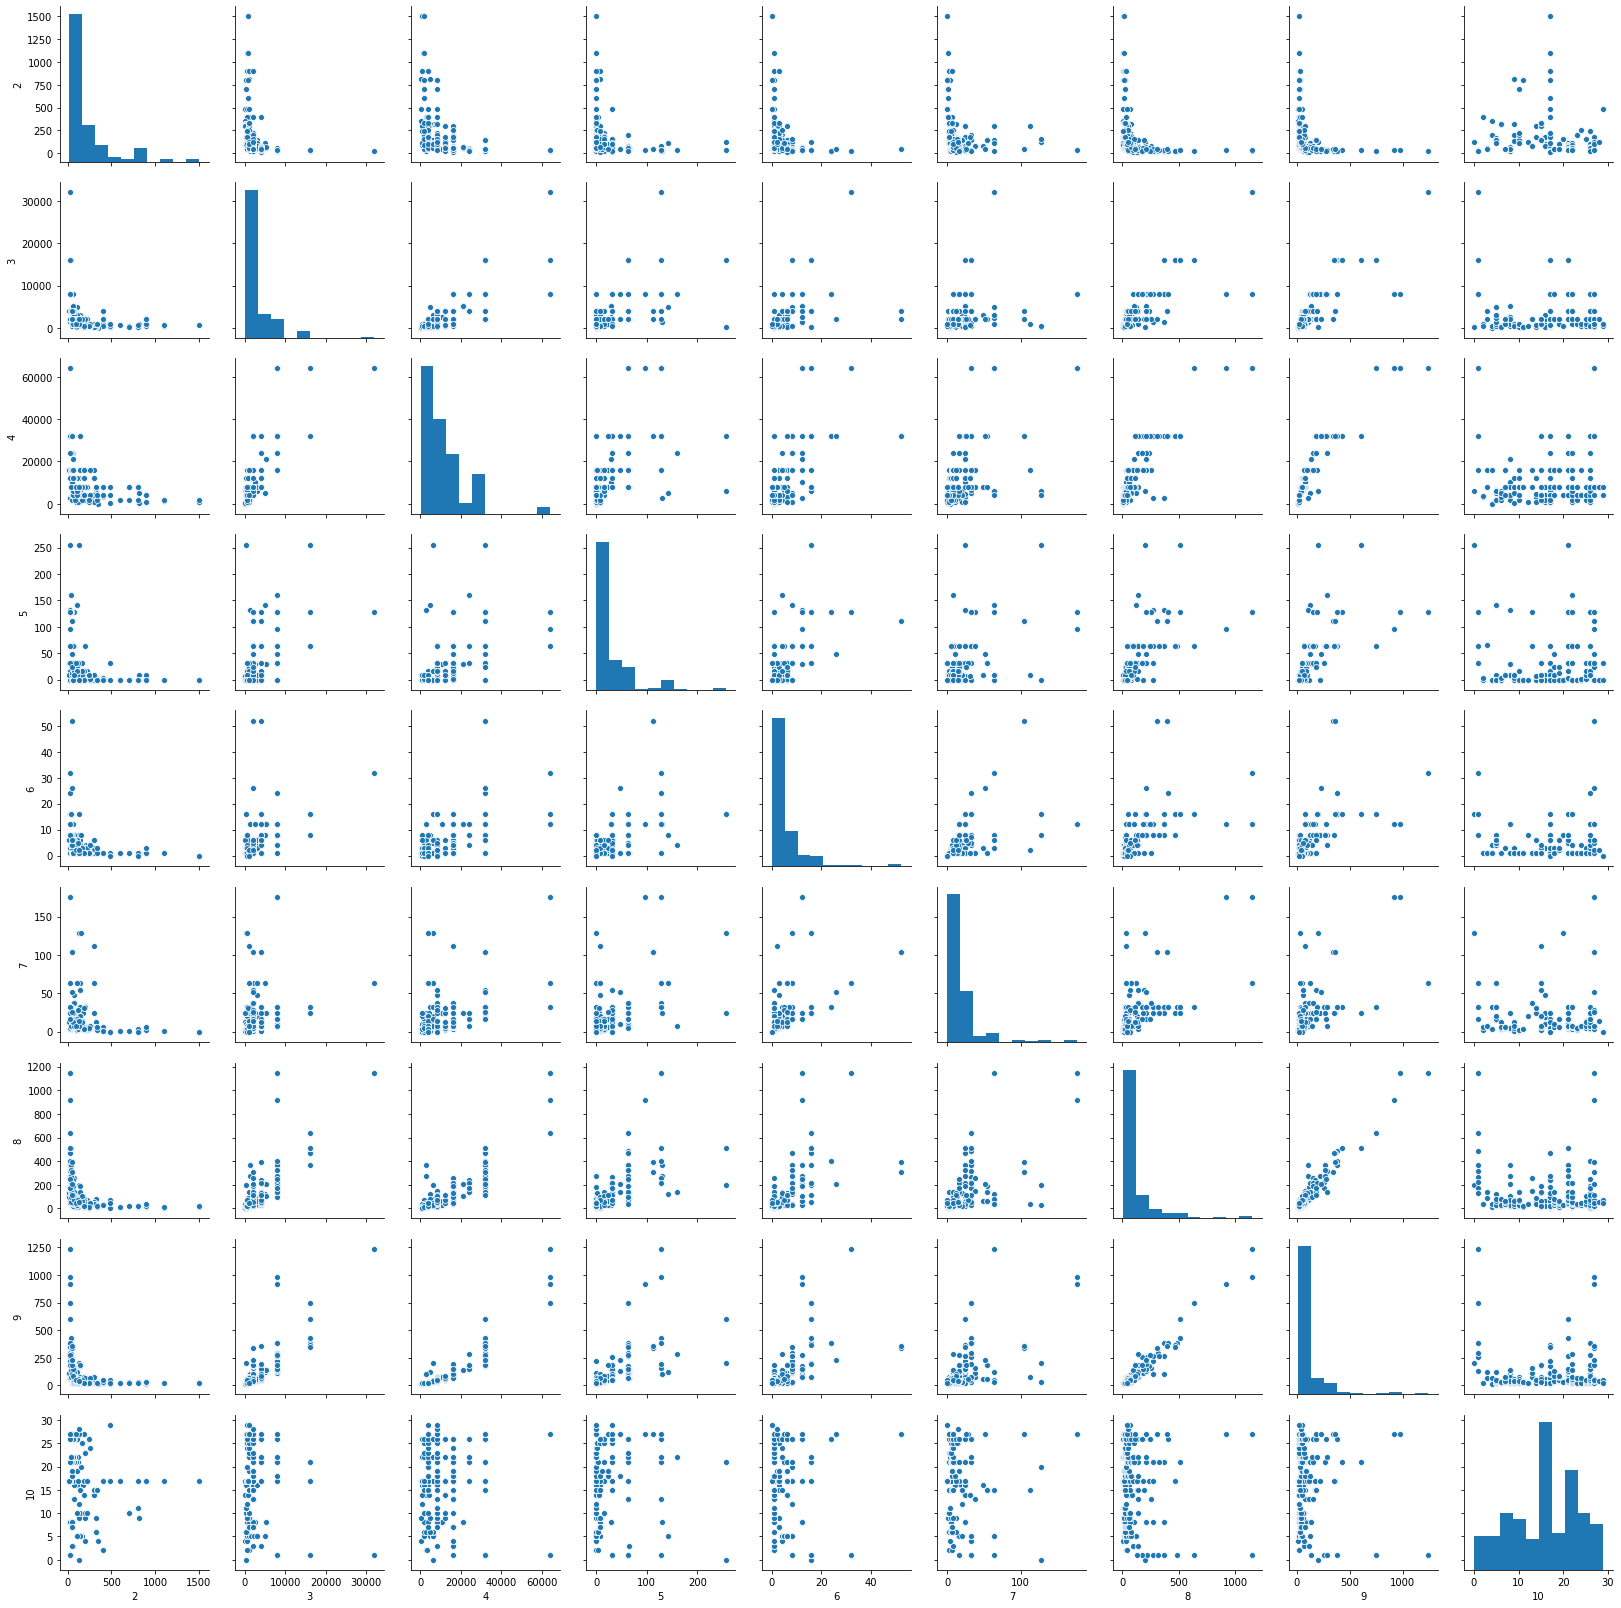

In [14]:
sns.pairplot(data)
plt.show()

In [15]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
regr1 = linear_model.LinearRegression()
regr1 = regr1.fit(X_train, y_train)

In [17]:
y_pred = regr1.predict(X_test) 

In [18]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(outputs, regr1.predict(inputs)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr1.score(inputs, outputs))

Mean squared error: 1927.26
Variance score: 0.92


Ta có thể thấy rằng mô hình khái quát được 92% dữ liệu, MSE lớn, giải pháp:

- Giả định xấu: khi đưa giả thiết rằng dữ liệu này có mối quan hệ tuyến tính => (Trực quan hóa dữ liệu có thể cho ta thấy điều này)  
- Tính năng kém: Các tính năng sử dụng có thể không có tương quan đủ cao với các giá trị ta đang cố gắng dự đoán.

In [19]:
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Variance score: 0.90


In [20]:
# 3. Check the score of train and test
regr1.score(X_test, y_test)

0.9003421925593028

In [21]:
regr1.score(X_train, y_train)

0.9554915586958355

In [22]:
# Visualization
y_train_hat = regr1.predict(X_train)
y_test_hat = regr1.predict(X_test)

C:\Users\thao.nguyenpl\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


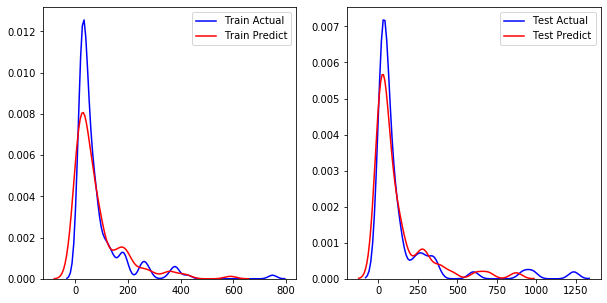

In [23]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
ax1 = sns.distplot(y_train, hist=False, color="b", label='Train Actual')
sns.distplot(y_train_hat, hist=False, color="r", label='Train Predict', ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist=False, color="b", label='Test Actual')
sns.distplot(y_test_hat, hist=False, color="r", label='Test Predict', ax=ax2)
plt.show()

**SELECT IMPORTANT FEATURES**

**_1. Dùng KBest_**

In [24]:
# Univariate Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [25]:
#apply SelectKBest class to extract all best features
bestfeatures = SelectKBest(score_func=f_regression, k='all')
fit = bestfeatures.fit(inputs,outputs)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(inputs.columns)

In [26]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print all features

   Specs        Score
6      8  2932.572973
2      4   895.035239
1      3   422.636024
3      5   150.332889
4      6   123.042584
5      7   111.779441
0      2    18.778451
7     10     0.085516


**_2. Dùng ExtraTree_**

In [27]:
from sklearn.ensemble import ExtraTreesRegressor

In [28]:
model = ExtraTreesRegressor()
model.fit(inputs,outputs)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

[0.00306986 0.05221597 0.60528576 0.02857583 0.01909483 0.00299838
 0.28690193 0.00185745]


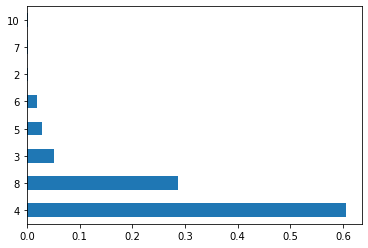

In [29]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based regressor
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=inputs.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

**_3. Dùng Heatmap correlation_**

In [30]:
corrmat = data.corr()
top_corr_features = corrmat.index

In [31]:
data.corr()

,2,3,4,5,6,7,8,9,10
2,1.000000,-0.335642,-0.378561,-0.321000,-0.301090,-0.250502,-0.307099,-0.288396,-0.080296
3,-0.335642,1.000000,0.758157,0.534729,0.517189,0.266907,0.794931,0.819292,-0.083438
4,-0.378561,0.758157,1.000000,0.537990,0.560513,0.527246,0.863004,0.901202,0.008180
5,-0.321000,0.534729,0.537990,1.000000,0.582245,0.487846,0.662641,0.648620,0.005729
6,-0.301090,0.517189,0.560513,0.582245,1.000000,0.548281,0.608903,0.610580,0.037202
7,-0.250502,0.266907,0.527246,0.487846,0.548281,1.000000,0.605209,0.592156,-0.012555
8,-0.307099,0.794931,0.863004,0.662641,0.608903,0.605209,1.000000,0.966472,-0.021662
9,-0.288396,0.819292,0.901202,0.648620,0.610580,0.592156,0.966472,1.000000,-0.020321
10,-0.080296,-0.083438,0.008180,0.005729,0.037202,-0.012555,-0.021662,-0.020321,1.000000


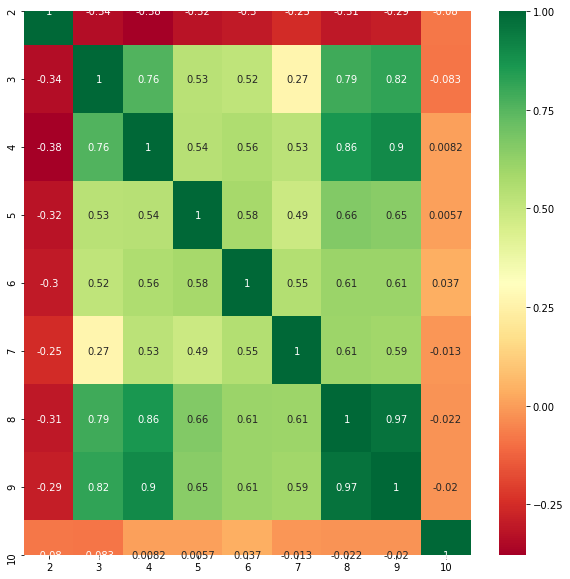

In [32]:
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),cmap="RdYlGn", annot=True) # annot=True: nếu muốn in cả giá trị

**Nhận xét: cả 3 cách đều cho thấy có thể loại bỏ 2 và 10**

In [33]:
inputs_b = inputs[[3,4,5,6,7,8]]

In [34]:
X_train_b = X_train[[3,4,5,6,7,8]]
X_test_b = X_test[[3,4,5,6,7,8]]

In [35]:
regr_b = linear_model.LinearRegression()
regr_b = regr_b.fit(X_train_b, y_train)

In [36]:
y_pred = regr_b.predict(X_test_b) 

In [37]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(outputs, regr_b.predict(inputs_b)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_b.score(inputs_b, outputs))

Mean squared error: 1990.89
Variance score: 0.92


**=> Vẫn chưa giảm được MSE**

**Polinominal**

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [40]:
X_pr=pr.fit_transform(inputs_b)

In [41]:
inputs_b.shape, X_pr.shape

((209, 6), (209, 28))

In [42]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_pr, outputs, test_size=0.30, random_state = 42) 
regr_n = linear_model.LinearRegression()
regr_n.fit(X_train_n, y_train_n)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
# The coefficients
print('Coefficients: \n', regr_n.coef_)
print('Intercept: \n', regr_n.intercept_)

Coefficients: 
 [ 1.09203515e+05  7.24308211e-04  1.66747737e-03  2.13918992e-01
  3.82959158e-02 -1.90654755e-02  4.22291653e-02 -6.28771501e-08
  3.06144800e-07 -4.17931598e-05  7.84583337e-05  4.15251553e-05
  8.65048022e-06  6.01465409e-08  2.29010335e-05  1.64253632e-05
  6.37587470e-06 -3.88959268e-06  1.78303203e-03  8.18232166e-03
 -2.22096432e-03  2.19818988e-04  4.62134537e-02 -2.57387786e-02
 -4.26426673e-04  1.42590080e-03  1.92961765e-04 -9.52418947e-05]
Intercept: 
 -109188.61958711439


In [44]:
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(outputs, regr_n.predict(X_pr)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr_n.score(X_pr, outputs))

Mean squared error: 1051.73
Variance score: 0.96


MSE có giảm nhưng không nhiều => **dùng Polinominal** có vẻ tốt hơn nhưng giải pháp tốt nhất vẫn là cần lấy thêm data

In [45]:
# Check the score of train and test
regr_n.score(X_train_n, y_train_n)

0.9992014812020791

In [46]:
regr_n.score(X_test_n, y_test_n)

0.935595064320711

In [47]:
y_train_hat_n = regr_n.predict(X_train_n)
y_test_hat_n = regr_n.predict(X_test_n)

C:\Users\thao.nguyenpl\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


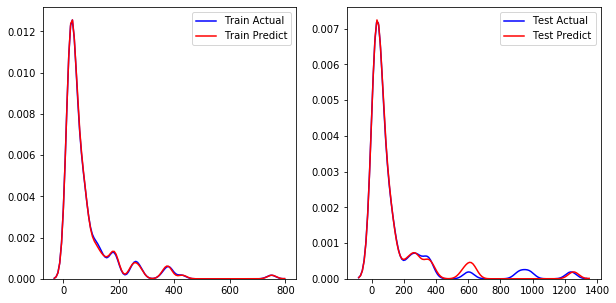

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
ax1 = sns.distplot(y_train_n, hist=False, color="b", label='Train Actual')
sns.distplot(y_train_hat_n, hist=False, color="r", label='Train Predict', ax=ax1)
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test_n, hist=False, color="b", label='Test Actual')
sns.distplot(y_test_hat_n, hist=False, color="r", label='Test Predict', ax=ax2)
plt.show()

 **------------------------------------------------------ End - Linear Regression -------------------------------------------------------**

**5. Với X_new như sau :**  
X_new = [['amdahl','470v/7b',29,8000,32000,32,8,32,172], ['sperry','1100/83',50,2000,32000,112,52,104,307]]  
thì ERP lần lượt là bao nhiêu? 

In [49]:
X_new = [['amdahl','470v/7b',29,8000,32000,32,8,32,172], ['sperry','1100/83',50,2000,32000,112,52,104,307]]

In [50]:
for x in range(len(X_new)):
    X_new[x].pop(0)
    X_new[x].pop(0)
    X_new[x].pop(0)
    
X_new

[[8000, 32000, 32, 8, 32, 172], [2000, 32000, 112, 52, 104, 307]]

In [51]:
X_new_pr=pr.fit_transform(X_new)
X_new_pr.shape

(2, 28)

In [52]:
y_pred_new = regr_n.predict(X_new_pr)

In [53]:
y_pred_new

array([251.76723858, 336.00393946])

X_new = [['amdahl','470v/7b',29,8000,32000,32,8,32,172], ['sperry','1100/83',50,2000,32000,112,52,104,307]]  
thì ERP lần lượt là **[251.76723858, 336.00393946]**